# Create and setup environment

In [1]:
"""
import sys
sys.path.append('content/htp_md')
!pip install -e .
!python setup.py install


import sys
import os


# Correct the path to the htp_md directory
htp_md_path = '/content/htp_md'  # Use the correct absolute path

# Check if the setup.py file exists
setup_file_path = os.path.join(htp_md_path, 'setup.py')

if os.path.exists(setup_file_path):
    sys.path.append(htp_md_path)
    # Use pip install with the correct path
    !pip install -e {htp_md_path}
else:
    print(f"Error: setup.py not found in {htp_md_path}")
!pip install torch-scatter==2.1.2
!pip install torch-geometric>=2.2.0"""

'\nimport sys\nsys.path.append(\'content/htp_md\')\n!pip install -e .\n!python setup.py install\n\n\nimport sys\nimport os\n\n\n# Correct the path to the htp_md directory\nhtp_md_path = \'/content/htp_md\'  # Use the correct absolute path\n\n# Check if the setup.py file exists\nsetup_file_path = os.path.join(htp_md_path, \'setup.py\')\n\nif os.path.exists(setup_file_path):\n    sys.path.append(htp_md_path)\n    # Use pip install with the correct path\n    !pip install -e {htp_md_path}\nelse:\n    print(f"Error: setup.py not found in {htp_md_path}")\n!pip install torch-scatter==2.1.2\n!pip install torch-geometric>=2.2.0'

# setup api keys

In [2]:
import os
import sys

# Add the root directory to Python path (where polymer_generation folder is)
sys.path.append(os.path.dirname(os.getcwd()))

# New imports from organized structure
from polymer_generation.generation.polymer_generator import PolymerGenerator
from polymer_generation.utils.api_utils import load_api_key
from polymer_generation.prompts.prompt_templates import PromptTemplates


/noether/s0/wdxb5775/anaconda3/envs/li_llm_optimization/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import sys
import os
data_home = '/noether/s0/dxb5775'

# Add path to the directory containing polymer_generation package
sys.path.append(data_home)

# Import from new organized structure
from polymer_generation.utils.api_utils import load_api_key
from polymer_generation.generation.polymer_generator import PolymerGenerator
from polymer_generation.prompts.prompt_templates import PromptTemplates

# Define paths and keywords
API_FILE_PATH = os.path.join(data_home, 'Textgrad prompt optimization/api_keys.txt')

# Load API keys
claude_api_key = load_api_key(API_FILE_PATH, 'claude')
openai_api_key = load_api_key(API_FILE_PATH, 'openai')

# Set environment variables
os.environ["ANTHROPIC_API_KEY"] = claude_api_key
os.environ["OPENAI_API_KEY"] = openai_api_key

# Create API keys dictionary for the generator
api_keys = {
    "claude": claude_api_key,
    "openai": openai_api_key
}

# Initialize the polymer generator
generator = PolymerGenerator(
    api_keys=api_keys,
    model_name="claude-3-5-sonnet",
    temperature=0.0
)

# Import libraries and dataset

In [4]:
import sys
import os

# Correct the path to the htp_md directory
htp_md_path = '/noether/s0/dxb5775/htp_md'  # Use the correct absolute path

# Check if the setup.py file exists
setup_file_path = os.path.join(htp_md_path, 'setup.py')




In [5]:
import argparse
import sys
import os
import os.path as osp
import csv
import numpy as np
import torch
import torch.nn.functional as F
from torch_geometric.data import DataLoader
import torch.nn as nn
from torch.nn import Sequential, Linear, ReLU, GRU
from torch_geometric.nn import CGConv, GlobalAttention, NNConv, Set2Set
import functools
from torch.utils.data import Dataset
from rdkit import Chem
from rdkit.Chem import AllChem

In [ ]:
# Test cell
#base_path = "/noether/s0/dxb5775/htp_md/htpmd/ml_models"
#smiles = ['CC(CCNCC(C)OC(=O)[Au])CCO[Cu]']
#property_name = 'conductivity'

#preds = predict(smiles, property_name, base_path)
#print(f"Predictions for {property_name}: {preds}")

# querying LLM

In [ ]:
import sys
import os
data_home = '/noether/s0/dxb5775'
sys.path.append(data_home)

from polymer_generation.utils.api_utils import load_api_key
from polymer_generation.generation.polymer_generator import PolymerGenerator
from polymer_generation.prompts.prompt_templates import PromptTemplates


In [ ]:
# 1. Setup API keys
API_FILE_PATH = os.path.join(data_home, 'Textgrad prompt optimization/api_keys.txt')
claude_api_key = load_api_key(API_FILE_PATH, 'claude')
openai_api_key = load_api_key(API_FILE_PATH, 'openai')

api_keys = {
    "claude": claude_api_key,
    "openai": openai_api_key
}

In [ ]:
# 2. Define test parameters
test_smiles_list = [
    "CC(CO[Cu])CSCCOC(=O)[Au]",
    "CC(CN(C)CCOC(=O)[Au])N[Cu]",
    "O=C([Au])NCCCCNC(=O)CCCN[Cu]"
]
target_conductivity = 1e-3  # 1 mS/cm
n_per_molecule = 3  # Generate 3 variants per molecule for testing
strategy = PromptTemplates.INITIAL_STRATEGY  # Use initial strategy


In [ ]:
# 3. Create generator instance
fpscores_path = os.path.join(data_home, 'htp_md/polymer_generation/fpscores.json')
generator = PolymerGenerator(
    api_keys=api_keys,
    base_path="/noether/s0/dxb5775/htp_md/htpmd/ml_models",
    model_name="claude-3-5-sonnet",
    temperature=0.0
)

In [ ]:
# 4. Run generation
print("Starting polymer generation...")
print(f"Number of parent molecules: {len(test_smiles_list)}")
print(f"Generations per molecule: {n_per_molecule}")
print(f"Target conductivity: {target_conductivity:.2e} mS/cm")
print("-" * 50)

result, validated_results, metrics_results = generator.generate_batch(
    starting_smiles_batch=test_smiles_list,
    target_conductivity=target_conductivity,
    strategy=strategy,
    n_per_molecule=n_per_molecule
)

In [ ]:
# 5. Print results summary
print("\nGeneration Results Summary:")
print("-" * 50)
print(f"Total parent molecules: {len(test_smiles_list)}")
print(f"Successfully generated: {len(validated_results)}")

for parent, gens in validated_results.items():
    print(f"\nParent: {parent}")
    print(f"Valid generations: {len(gens)}/{n_per_molecule}")
    print("Generated molecules:")
    for i, gen in enumerate(gens, 1):
        print(f"\nGeneration {i}:")
        print(f"SMILES: {gen['generated_smiles']}")
        print(f"Conductivity: {gen['actual_conductivity']:.2e} mS/cm")
        print(f"Improvement Factor: {gen['improvement_factor']:.2f}x")
        print(f"Explanation: {gen['explanation']}")


In [ ]:
# 6. Print metrics summary
if metrics_results:
    print("\nMetrics Summary:")
    print("-" * 50)
    for parent, metrics in metrics_results.items():
        print(f"\nMetrics for {parent}:")
        for metric, value in metrics.items():
            if isinstance(value, float):
                print(f"{metric}: {value:.3f}")

# test the new optimization scheme

In [ ]:
import sys
import os
data_home = '/noether/s0/dxb5775'
sys.path.append(data_home)

from polymer_generation.utils.api_utils import load_api_key
from polymer_generation.generation.polymer_generator import PolymerGenerator
from polymer_generation.optimization.strategy_optimizer import StrategyOptimizer
from polymer_generation.prompts.prompt_templates import PromptTemplates
from polymer_generation.utils import BatchProcessor  # Import the class

# 1. Setup API keys and paths
API_FILE_PATH = os.path.join(data_home, 'Textgrad prompt optimization/api_keys.txt')
claude_api_key = load_api_key(API_FILE_PATH, 'claude')
openai_api_key = load_api_key(API_FILE_PATH, 'openai')

api_keys = {
    "claude": claude_api_key,
    "openai": openai_api_key
}

# 2. Create test data
test_smiles_list = [
    "COCC(CNCC(CF)OC(=O)[Au])O[Cu]",
    "C#CCCN(CC(C)OC(=O)[Au])C(C)CO[Cu]",
    "C=CCC(CNCC(CC)O[Cu])COC(=O)[Au]"
]


In [ ]:
# 3. Create batch processor instance and create batches
batch_processor = BatchProcessor()
batch_data = batch_processor.create_batches(
    smiles_list=test_smiles_list,
    target_conductivity=1e-3,  # 1 mS/cm
    batch_size=2  # Small batch size for testing
)

# 4. Initialize generator and optimizer
generator = PolymerGenerator(
    api_keys=api_keys,
    base_path="/noether/s0/dxb5775/htp_md/htpmd/ml_models",
    model_name="claude-3-5-sonnet",
    temperature=0.0
)


In [ ]:
optimizer = StrategyOptimizer(
    polymer_generator=generator,
    initial_strategy=PromptTemplates.INITIAL_STRATEGY
)

In [ ]:
# 5. Run optimization
print("Starting Strategy Optimization...")
print(f"Initial Strategy: {PromptTemplates.INITIAL_STRATEGY}")
print(f"Number of molecules: {len(test_smiles_list)}")
print(f"Batch size: {batch_data['batch_size']}")
print("-" * 50)
optimization_results = optimizer.optimize(
    batch_data=batch_data,
    n_epochs=3,  # Small number of epochs for testing
    n_per_molecule=3  # Small number of generations for testing
)

In [ ]:
# Print optimization results
print("\nOptimization Results:")
print("=" * 80)
print(f"Best epoch: {optimization_results['best_epoch']}")
print(f"Best performance: {optimization_results['best_performance']:.2f}x")
print(f"Initial strategy: {optimization_results['initial_strategy']}")

print("\nPerformance Trajectory:")
print("-" * 50)
for i, perf in enumerate(optimization_results['final_summary']['performance_trajectory']):
    print(f"Epoch {i}: {perf:.3f}x")

print("\nBatch Performances:")
print("-" * 50)
for i, batch_perfs in enumerate(optimization_results['final_summary']['batch_performances']):
    print(f"Epoch {i} batches: {[f'{perf:.3f}x' for perf in batch_perfs]}")

print("\nDetailed Epoch Analysis:")
print("=" * 80)
for epoch_info in optimization_results['epoch_results']:
    print(f"\nEpoch {epoch_info['epoch_number']}:")
    print("-" * 50)
    print(f"Strategy: {epoch_info['strategy']}")
    print(f"Performance: {epoch_info['performance']:.3f}x")
    
    # Print batch info
    if 'batch_performances' in epoch_info:
        print("\nBatch Performances:")
        print([f"{perf:.3f}x" for perf in epoch_info['batch_performances']])
    
    # Print results summary
    if 'results' in epoch_info:
        print("\nResults Summary:")
        for parent, generations in epoch_info['results'].items():
            print(f"\nParent: {parent}")
            print(f"Number of generations: {len(generations)}")
            best_gen = max(generations, key=lambda x: x['improvement_factor'])
            print(f"Best improvement: {best_gen['improvement_factor']:.3f}x")
            print(f"Best generation: {best_gen['generated_smiles']}")
            print(f"Explanation: {best_gen['explanation']}")
    
    # Print metrics
    if 'metrics' in epoch_info:
        print("\nMetrics:")
        for parent, metric_dict in epoch_info['metrics'].items():
            print(f"\nMetrics for {parent}:")
            for metric, value in metric_dict.items():
                if isinstance(value, float):
                    print(f"{metric}: {value:.3f}")
                else:
                    print(f"{metric}: {value}")
    
    # Print analysis
    if 'analysis' in epoch_info and epoch_info['analysis']:
        print("\nStrategy Analysis:")
        print("Strengths:")
        for strength in epoch_info['analysis'].get('strengths', []):
            print(f"- {strength}")
        print("\nWeaknesses:")
        for weakness in epoch_info['analysis'].get('weaknesses', []):
            print(f"- {weakness}")
        print("\nRecommendations:")
        for rec in epoch_info['analysis'].get('recommendations', []):
            print(f"- {rec}")

print("\nFinal Summary:")
print("=" * 80)
print(f"Best Strategy: {optimization_results['final_summary']['best_strategy']}")
print(f"Best Performance: {optimization_results['final_summary']['best_performance']:.3f}x")
print(f"Total Epochs: {len(optimization_results['epoch_results'])}")

# test run optimization

In [6]:
import sys
import os
import pandas as pd
import numpy as np
from datetime import datetime
import json

from polymer_generation.utils import (
    load_api_key,
    BatchProcessor,
    split_using_kmeans,
    save_optimization_results,
    load_optimization_results,  # Add this if you'll need it
    analyze_optimization_results  # Add this if you'll need it
)
from polymer_generation.generation.polymer_generator import PolymerGenerator
from polymer_generation.optimization.strategy_optimizer import StrategyOptimizer
from polymer_generation.prompts.prompt_templates import PromptTemplates

In [7]:
# Load and prepare data
data_home = '/noether/s0/dxb5775'

polygen_dataset = pd.read_csv(os.path.join(data_home, 'htp_md/PolyGen-train-set-from-HTP-MD.csv'))
print("\nInitial Dataset:")
print(f"Total molecules: {len(polygen_dataset)}")
print(f"Columns: {polygen_dataset.columns.tolist()}")



Initial Dataset:
Total molecules: 6024
Columns: ['Unnamed: 0', 'sample_id', 'mol_smiles', 'conductivity']


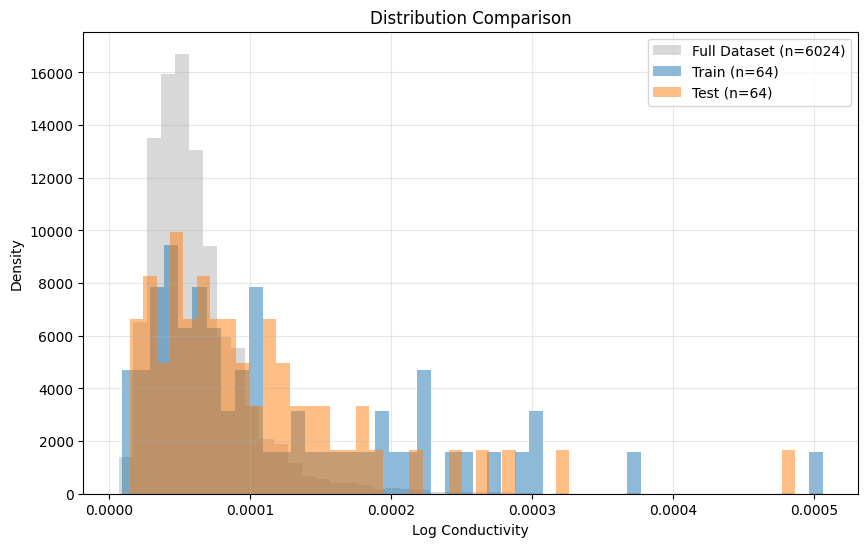


Split Summary:
Full dataset: 6024 molecules
Train set: 64 molecules
Test set: 64 molecules

Full dataset conductivity range: 6.92e-06 to 5.07e-04
Train conductivity range: 9.70e-06 to 5.07e-04
Test conductivity range: 1.52e-05 to 4.87e-04

Data Split Summary:
Train set size: 64
Test set size: 64


In [8]:
# Split data using KMeans
train_data, test_data = split_using_kmeans(
    df=polygen_dataset,
    n_samples=128,
    train_frac=0.5,
    random_state=42
)
print("\nData Split Summary:")
print(f"Train set size: {len(train_data)}")
print(f"Test set size: {len(test_data)}")

In [9]:
# Create single batch processor instance
batch_processor = BatchProcessor()

# Create batches for both train and test
train_batch_data = batch_processor.create_batches(
    smiles_list=train_data['mol_smiles'].tolist(),
    target_conductivity=1e-3,  # 1 mS/cm
    batch_size=4  # number of molecules per batch
)

test_batch_data = batch_processor.create_batches(
    smiles_list=test_data['mol_smiles'].tolist(),
    target_conductivity=1e-3,  # 1 mS/cm
    batch_size=4  # same batch size as training
)

print("\nBatch Creation Summary:")
print("Training:")
print(f"Number of batches: {len(train_batch_data['batches'])}")  # Changed from n_batches
print(f"Batch size: {train_batch_data['batch_size']}")
print(f"Total molecules: {train_batch_data['total_molecules']}")
print(f"First batch size: {len(train_batch_data['batches']['batch_0']['smiles'])}")  # Optional verification

print("\nTesting:")
print(f"Number of batches: {len(test_batch_data['batches'])}")  # Changed from n_batches
print(f"Batch size: {test_batch_data['batch_size']}")
print(f"Total molecules: {test_batch_data['total_molecules']}")
print(f"First batch size: {len(test_batch_data['batches']['batch_0']['smiles'])}")  # Optional verification


Batch Creation Summary:
Training:
Number of batches: 16
Batch size: 4
Total molecules: 64
First batch size: 4

Testing:
Number of batches: 16
Batch size: 4
Total molecules: 64
First batch size: 4


In [10]:
# Setup API keys
API_FILE_PATH = os.path.join(data_home, 'Textgrad prompt optimization/api_keys.txt')
CLAUDE_API_KEY = load_api_key(API_FILE_PATH, 'claude')

api_keys = {
    "claude": CLAUDE_API_KEY
}

In [11]:
# Initialize generator and optimizer
generator = PolymerGenerator(
    api_keys=api_keys,
    base_path="/noether/s0/dxb5775/htp_md/htpmd/ml_models",
    model_name="claude-3-5-sonnet",
    temperature=0.0
)

optimizer = StrategyOptimizer(
    polymer_generator=generator,
    initial_strategy=PromptTemplates.INITIAL_STRATEGY
)


## run the optimization cell and save results

In [ ]:
# Run optimization
print("\nStarting Strategy Optimization")
print("=" * 50)
print(f"Model: claude-3-5-sonnet")
print(f"Number of epochs: 10")
print(f"Generations per molecule: 5")
print(f"Initial strategy: {PromptTemplates.INITIAL_STRATEGY}")
print(f"Target conductivity: 1e-3 mS/cm")
print("=" * 50)

optimization_results = optimizer.optimize(
    batch_data=train_batch_data,
    n_epochs=10,
    n_per_molecule=5
)

In [ ]:

# Usage:
# Save results using the save_optimization_results function
base_dir = "/noether/s0/dxb5775/htp_md/optimization_results"  # Specify your desired base directory
results_dir = save_optimization_results(
    optimization_results=optimization_results,
    base_dir=base_dir
)

print(f"\nDetailed results and summary can be found in: {results_dir}")


# load optimization results

In [12]:
from polymer_generation.utils.io_utils import load_optimization_results
from polymer_generation.utils.visualization import analyze_optimization_results


In [13]:
import json
timestamp='20250224_150041'
results_dir=os.path.join('/noether/s0/dxb5775/htp_md/optimization_results/', timestamp)
# Example loading:
loaded_results = load_optimization_results(results_dir)

In [14]:
optimization_results=loaded_results.copy()
# Print the loaded results
# Print results summary
print("\nOptimization Results Summary:")
print("-" * 50)
print(f"Best Performance: {optimization_results['best_performance']:.2f}x improvement")
print(f"Found in Epoch: {optimization_results['best_epoch']}")
print("\nPerformance Trajectory:")
for epoch, perf in enumerate(optimization_results['final_summary']['performance_trajectory']):
    print(f"Epoch {epoch}: {perf:.2f}x improvement")

# Access best strategy
best_strategy = optimization_results['final_summary']['best_strategy']
print("\nBest Strategy Found:")
print(best_strategy)


Optimization Results Summary:
--------------------------------------------------
Best Performance: 1.09x improvement
Found in Epoch: 3

Performance Trajectory:
Epoch 0: 0.84x improvement
Epoch 1: 0.84x improvement
Epoch 2: 0.97x improvement
Epoch 3: 1.09x improvement
Epoch 4: 0.96x improvement
Epoch 5: 0.97x improvement
Epoch 6: 0.99x improvement
Epoch 7: 0.96x improvement
Epoch 8: 0.98x improvement
Epoch 9: 0.96x improvement
Epoch 10: 0.96x improvement

Best Strategy Found:
1. Prioritize ether linkage extensions and additions
2. Optimize chain lengths for maximum conductivity
3. Strategically modify metal coordination sites
4. Introduce branching and N-methylation selectively
5. Balance polarity and flexibility
6. Incorporate hydroxyl groups near metal centers
7. Experiment with alternative heteroatoms (e.g., S, N)
8. Combine multiple beneficial modifications
9. Consider cyclic structures for controlled rigidity
10. Fine-tune spacer lengths between functional groups


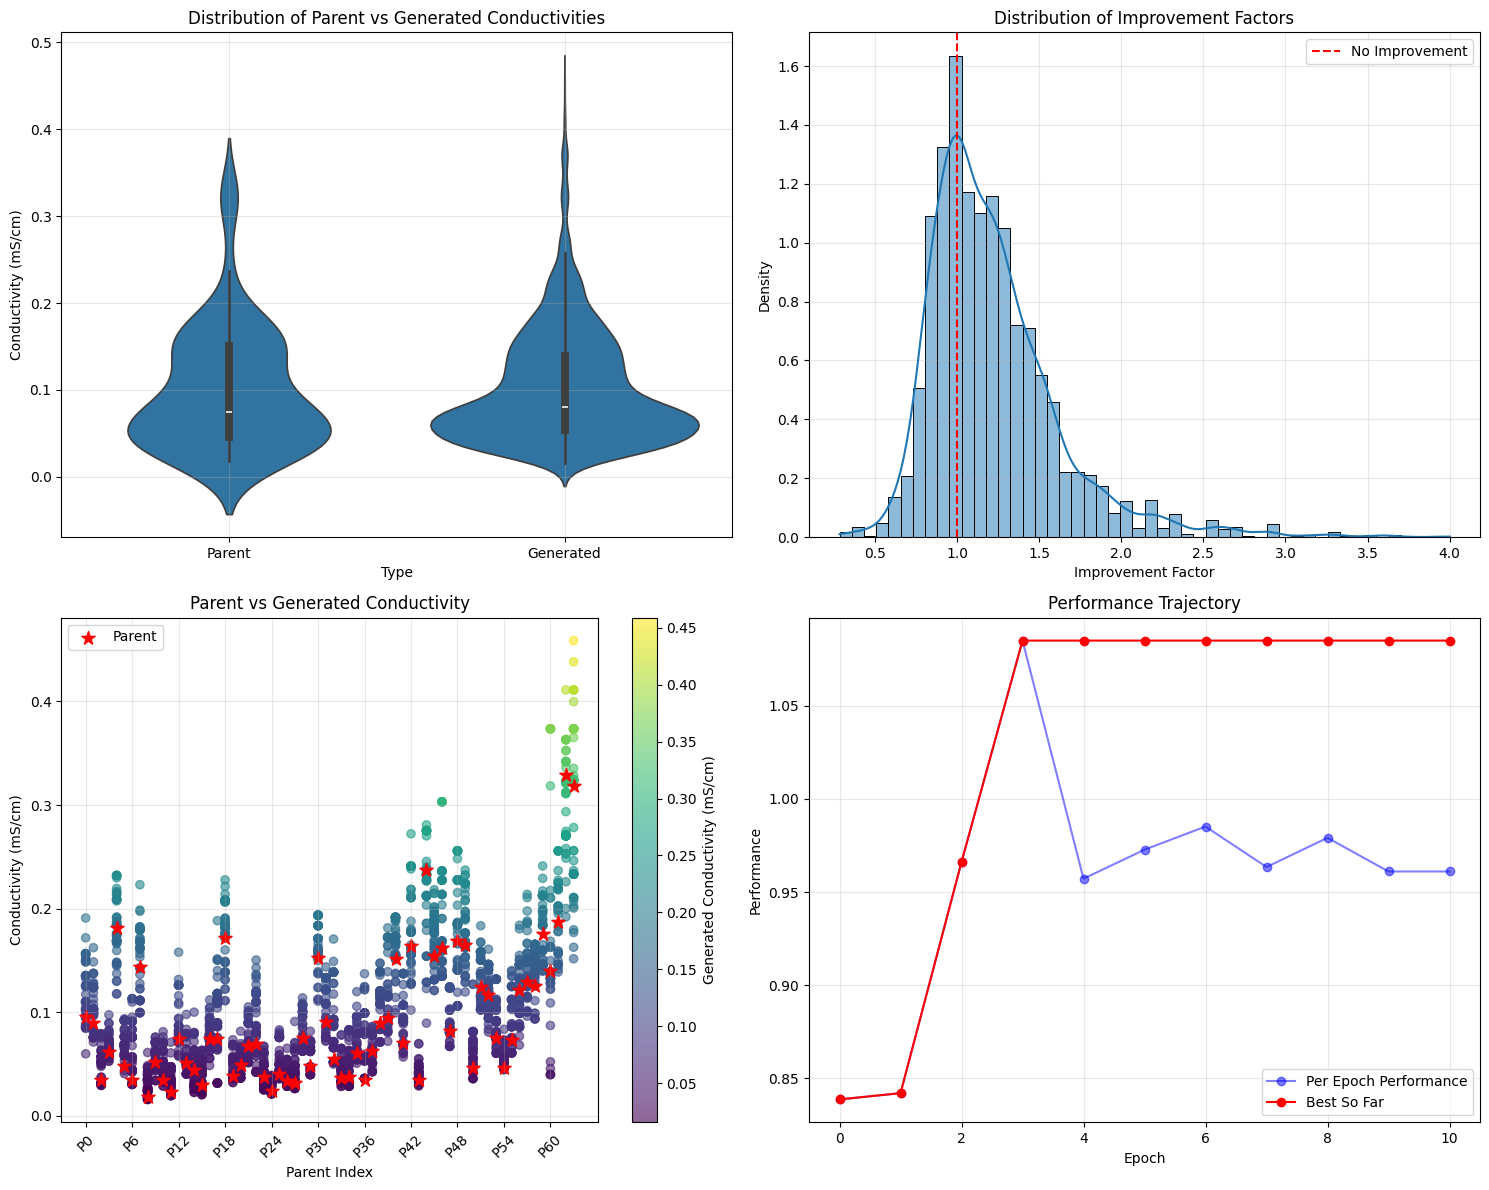


Summary Statistics:
Number of unique parent molecules: 64
Total generated molecules: 3396

Improvement Factors:
Mean: 1.22x
Max: 4.00x
Percentage of improvements: 67.8%

Conductivity Statistics:
Parent Conductivities:
  Mean: 0.0913
  Min: 0.0183
  Max: 0.3286

Generated Conductivities:
  Mean: 0.1028
  Min: 0.0157
  Max: 0.4588


In [15]:
analyze_optimization_results(optimization_results)

# Evaluating the best strategy for a single-epoch run

In [16]:
from polymer_generation.optimization import StrategyEvaluator
from polymer_generation.utils import analyze_optimization_results, save_optimization_results


In [31]:
from polymer_generation.optimization import StrategyEvaluator
from polymer_generation.utils import analyze_optimization_results, save_optimization_results

# Using your existing API keys setup
API_FILE_PATH = os.path.join(data_home, 'Textgrad prompt optimization/api_keys.txt')
CLAUDE_API_KEY = load_api_key(API_FILE_PATH, 'claude')

api_keys = {
    "claude": CLAUDE_API_KEY
}

# Get best strategy from your optimization results
best_strategy = optimization_results['final_summary']['best_strategy']

In [32]:
# Initialize generator for training evaluation
train_generator = PolymerGenerator(
    api_keys=api_keys,
    base_path="/noether/s0/dxb5775/htp_md/htpmd/ml_models",
    model_name="claude-3-5-sonnet",
    temperature=0.0  # Add some randomness
)

# Initialize evaluator for training
train_evaluator = StrategyEvaluator(
    polymer_generator=train_generator,
    evaluation_strategy=best_strategy
)

# Run training evaluation
print("Evaluating on training data...")
train_evaluation = train_evaluator.evaluate(
    batch_data=train_batch_data,
    n_per_molecule=5
)

Evaluating on training data...

STARTING EVALUATION
Total batches: 16
Molecules per batch: 4
Generations per molecule: 5
Evaluation strategy: 1. Prioritize ether linkage extensions and additions
2. Optimize chain lengths for maximum conductivity
3. Strategically modify metal coordination sites
4. Introduce branching and N-methylation selectively
5. Balance polarity and flexibility
6. Incorporate hydroxyl groups near metal centers
7. Experiment with alternative heteroatoms (e.g., S, N)
8. Combine multiple beneficial modifications
9. Consider cyclic structures for controlled rigidity
10. Fine-tune spacer lengths between functional groups

PROCESSING BATCH
--------------------------------------------------
Number of molecules in batch: 4
Target conductivity: 1.00e-03 mS/cm
Generations per molecule: 5

Preparing LLM prompt...

Prompt sent to LLM:
------------------------------
Generate valid polymer SMILES that achieve target ion conductivity.

Example valid formats:
CC(CO[Cu])CSCCOC(=O)[A

In [33]:
# Initialize new generator for test evaluation
test_generator = PolymerGenerator(
    api_keys=api_keys,
    base_path="/noether/s0/dxb5775/htp_md/htpmd/ml_models",
    model_name="claude-3-5-sonnet",
    temperature=0.0  # Same temperature for fair comparison
)

# Initialize evaluator for testing
test_evaluator = StrategyEvaluator(
    polymer_generator=test_generator,
    evaluation_strategy=best_strategy
)

# Run test evaluation
print("\nEvaluating on test data...")
test_evaluation = test_evaluator.evaluate(
    batch_data=test_batch_data,
    n_per_molecule=5
)


Evaluating on test data...

STARTING EVALUATION
Total batches: 16
Molecules per batch: 4
Generations per molecule: 5
Evaluation strategy: 1. Prioritize ether linkage extensions and additions
2. Optimize chain lengths for maximum conductivity
3. Strategically modify metal coordination sites
4. Introduce branching and N-methylation selectively
5. Balance polarity and flexibility
6. Incorporate hydroxyl groups near metal centers
7. Experiment with alternative heteroatoms (e.g., S, N)
8. Combine multiple beneficial modifications
9. Consider cyclic structures for controlled rigidity
10. Fine-tune spacer lengths between functional groups

PROCESSING BATCH
--------------------------------------------------
Number of molecules in batch: 4
Target conductivity: 1.00e-03 mS/cm
Generations per molecule: 5

Preparing LLM prompt...

Prompt sent to LLM:
------------------------------
Generate valid polymer SMILES that achieve target ion conductivity.

Example valid formats:
CC(CO[Cu])CSCCOC(=O)[Au]



Analyzing Data Overlap

Input Data Analysis:
------------------------------
Training molecules: 19
Testing molecules: 19
Common molecules: 0
Overlap percentage: 0.00%

Generated Molecules Analysis:
------------------------------
Training generations: 89
Testing generations: 86
Common generations: 0
Overlap percentage: 0.00%

Performance Comparison:
------------------------------
Improvement Factors:
Training mean: 1.37 ± 0.44
Testing mean: 1.32 ± 0.37


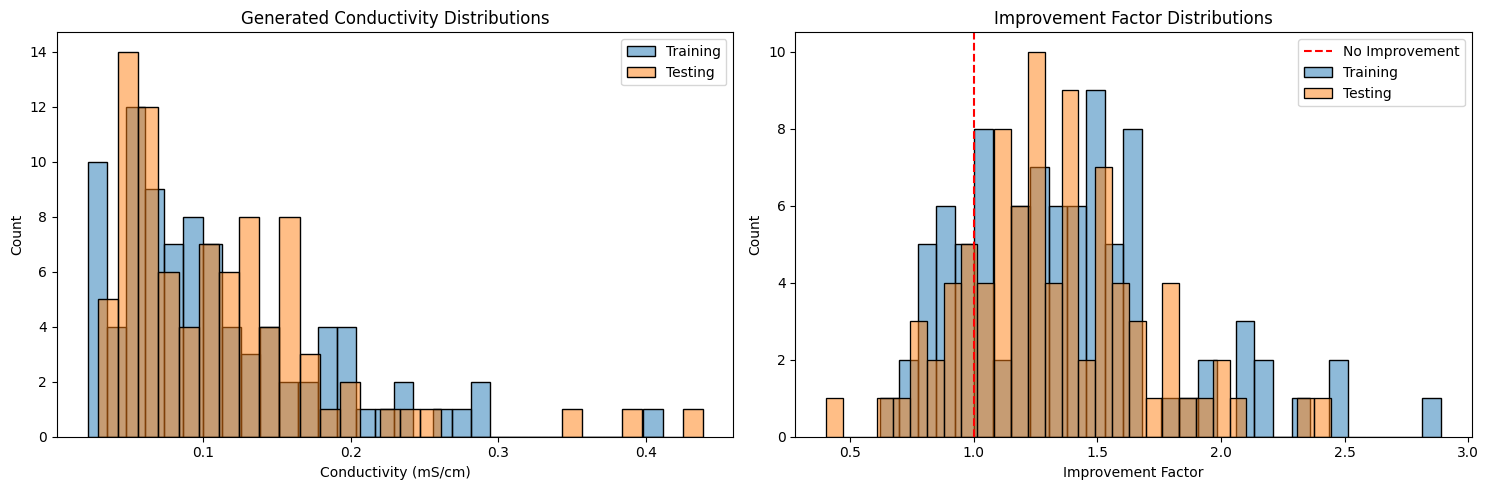

In [34]:
def analyze_data_overlap(train_batch_data, test_batch_data, train_evaluation, test_evaluation):
    """
    Analyze overlap between training and test data, both input and results
    
    Args:
        train_batch_data: Training batch data
        test_batch_data: Test batch data
        train_evaluation: Training evaluation results
        test_evaluation: Test evaluation results
    """
    print("\nAnalyzing Data Overlap")
    print("=" * 50)
    
    # 1. Analyze input data overlap
    train_smiles = set([
        smiles 
        for batch_info in train_batch_data['batches'].values() 
        for smiles in batch_info['smiles']
    ])
    test_smiles = set([
        smiles 
        for batch_info in test_batch_data['batches'].values() 
        for smiles in batch_info['smiles']
    ])
    
    common_smiles = train_smiles.intersection(test_smiles)
    
    print("\nInput Data Analysis:")
    print("-" * 30)
    print(f"Training molecules: {len(train_smiles)}")
    print(f"Testing molecules: {len(test_smiles)}")
    print(f"Common molecules: {len(common_smiles)}")
    print(f"Overlap percentage: {len(common_smiles)/len(train_smiles)*100:.2f}%")
    
    if common_smiles:
        print("\nCommon molecules:")
        for smiles in common_smiles:
            print(f"- {smiles}")
    
    # 2. Analyze evaluation results overlap
    train_results = train_evaluation['epoch_results'][0]['results']
    test_results = test_evaluation['epoch_results'][0]['results']
    
    train_generated = set()
    test_generated = set()
    
    # Collect all generated SMILES
    for parent, generations in train_results.items():
        for gen in generations:
            train_generated.add(gen['generated_smiles'])
    
    for parent, generations in test_results.items():
        for gen in generations:
            test_generated.add(gen['generated_smiles'])
    
    common_generated = train_generated.intersection(test_generated)
    
    print("\nGenerated Molecules Analysis:")
    print("-" * 30)
    print(f"Training generations: {len(train_generated)}")
    print(f"Testing generations: {len(test_generated)}")
    print(f"Common generations: {len(common_generated)}")
    print(f"Overlap percentage: {len(common_generated)/len(train_generated)*100:.2f}%")
    
    if common_generated:
        print("\nCommon generated molecules:")
        for smiles in common_generated:
            print(f"- {smiles}")
    
    # 3. Analyze performance distributions
    train_improvements = [
        gen['improvement_factor']
        for gens in train_results.values()
        for gen in gens
    ]
    
    test_improvements = [
        gen['improvement_factor']
        for gens in test_results.values()
        for gen in gens
    ]
    
    import numpy as np
    print("\nPerformance Comparison:")
    print("-" * 30)
    print("Improvement Factors:")
    print(f"Training mean: {np.mean(train_improvements):.2f} ± {np.std(train_improvements):.2f}")
    print(f"Testing mean: {np.mean(test_improvements):.2f} ± {np.std(test_improvements):.2f}")
    
    # 4. Visualize distributions
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot conductivity distributions
    train_conductivities = [gen['actual_conductivity'] for gens in train_results.values() for gen in gens]
    test_conductivities = [gen['actual_conductivity'] for gens in test_results.values() for gen in gens]
    
    sns.histplot(data=train_conductivities, ax=ax1, alpha=0.5, label='Training', bins=30)
    sns.histplot(data=test_conductivities, ax=ax1, alpha=0.5, label='Testing', bins=30)
    ax1.set_title('Generated Conductivity Distributions')
    ax1.set_xlabel('Conductivity (mS/cm)')
    ax1.set_ylabel('Count')
    ax1.legend()
    
    # Plot improvement factor distributions
    sns.histplot(data=train_improvements, ax=ax2, alpha=0.5, label='Training', bins=30)
    sns.histplot(data=test_improvements, ax=ax2, alpha=0.5, label='Testing', bins=30)
    ax2.axvline(1.0, color='r', linestyle='--', label='No Improvement')
    ax2.set_title('Improvement Factor Distributions')
    ax2.set_xlabel('Improvement Factor')
    ax2.set_ylabel('Count')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

# Analyze overlap between training and test data
analyze_data_overlap(
    train_batch_data=train_batch_data,
    test_batch_data=test_batch_data,
    train_evaluation=train_evaluation,
    test_evaluation=test_evaluation
)

### visualize evaluation results

In [39]:
def analyze_evaluation_comparison(train_results, test_results, save_plots=False, save_dir=None):
    """
    Analyze and compare training and test evaluation results
    
    Args:
        train_results: Results from training data evaluation
        test_results: Results from test data evaluation
        save_plots: Boolean to control if plots should be saved (default: False)
        save_dir: Directory to save plots if save_plots is True (default: None)
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd
    import numpy as np
    import os
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # Process data
    def process_results(results, dataset_type):
        epoch_data = results['epoch_results'][0]
        all_data = []
        for parent_smiles, generations in epoch_data['results'].items():
            for gen in generations:
                all_data.append({
                    'parent_smiles': parent_smiles,
                    'parent_conductivity': gen['parent_conductivity'],
                    'generated_conductivity': gen['actual_conductivity'],
                    'improvement_factor': gen['improvement_factor'],
                    'dataset': dataset_type
                })
        return pd.DataFrame(all_data)
    
    train_df = process_results(train_results, 'Training')
    test_df = process_results(test_results, 'Testing')
    combined_df = pd.concat([train_df, test_df])
    
    # 1. Violin Plot
    violin_data = pd.DataFrame({
        'Conductivity': (
            list(train_df['parent_conductivity'].unique()) + 
            list(train_df['generated_conductivity']) +
            list(test_df['parent_conductivity'].unique()) + 
            list(test_df['generated_conductivity'])
        ),
        'Type': (
            ['Parent']*len(train_df['parent_conductivity'].unique()) + 
            ['Generated']*len(train_df['generated_conductivity']) +
            ['Parent']*len(test_df['parent_conductivity'].unique()) + 
            ['Generated']*len(test_df['generated_conductivity'])
        ),
        'Dataset': (
            ['Training']*len(train_df['parent_conductivity'].unique()) + 
            ['Training']*len(train_df['generated_conductivity']) +
            ['Testing']*len(test_df['parent_conductivity'].unique()) + 
            ['Testing']*len(test_df['generated_conductivity'])
        )
    })
    
    sns.violinplot(data=violin_data, x='Type', y='Conductivity', hue='Dataset', ax=ax1)
    ax1.set_title('Distribution of Conductivities')
    ax1.set_ylabel('Conductivity (mS/cm)')
    ax1.grid(True, alpha=0.3)

    # 2. Improvement Factors Distribution
    sns.histplot(data=train_df, x='improvement_factor', ax=ax2, 
                label='Training', alpha=0.5, bins=30, stat='density')
    sns.histplot(data=test_df, x='improvement_factor', ax=ax2, 
                label='Testing', alpha=0.5, bins=30, stat='density')
    sns.kdeplot(data=train_df, x='improvement_factor', ax=ax2, 
                color='blue', linewidth=2, label='Training (KDE)')
    sns.kdeplot(data=test_df, x='improvement_factor', ax=ax2, 
                color='orange', linewidth=2, label='Testing (KDE)')
    ax2.axvline(1.0, color='r', linestyle='--', label='No Improvement')
    ax2.set_title('Distribution of Improvement Factors')
    ax2.set_xlabel('Improvement Factor')
    ax2.set_ylabel('Density')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # 3. Parent vs Generated Scatter
    # Training data
    ax3.scatter(train_df['parent_conductivity'], train_df['parent_conductivity'],
                marker='*', s=100, c='blue', label='Training Parents', alpha=0.7)
    ax3.scatter(train_df['parent_conductivity'], train_df['generated_conductivity'],
                marker='o', s=50, c='lightblue', label='Training Generated', alpha=0.5)
    
    # Testing data
    ax3.scatter(test_df['parent_conductivity'], test_df['parent_conductivity'],
                marker='*', s=100, c='red', label='Testing Parents', alpha=0.7)
    ax3.scatter(test_df['parent_conductivity'], test_df['generated_conductivity'],
                marker='o', s=50, c='orange', label='Testing Generated', alpha=0.5)
    
    # Add y=x line
    lims = [
        min(combined_df['parent_conductivity'].min(), combined_df['generated_conductivity'].min()),
        max(combined_df['parent_conductivity'].max(), combined_df['generated_conductivity'].max())
    ]
    ax3.plot(lims, lims, 'k--', alpha=0.5, label='No Improvement')
    ax3.set_title('Parent vs Generated Conductivity')
    ax3.set_xlabel('Parent Conductivity (mS/cm)')
    ax3.set_ylabel('Generated Conductivity (mS/cm)')
    ax3.set_xscale('log')
    ax3.set_yscale('log')
    ax3.grid(True, alpha=0.3)
    ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # 4. Improvement Factor vs Parent Conductivity
    scatter = ax4.scatter(train_df['parent_conductivity'], 
                         train_df['improvement_factor'],
                         c='blue', marker='o', alpha=0.5, 
                         label='Training')
    scatter = ax4.scatter(test_df['parent_conductivity'], 
                         test_df['improvement_factor'],
                         c='orange', marker='o', alpha=0.5, 
                         label='Testing')
    ax4.axhline(y=1.0, color='r', linestyle='--', label='No Improvement')
    ax4.set_title('Improvement Factor vs Parent Conductivity')
    ax4.set_xlabel('Parent Conductivity (mS/cm)')
    ax4.set_ylabel('Improvement Factor')
    ax4.set_xscale('log')
    ax4.grid(True, alpha=0.3)
    ax4.legend()

    plt.tight_layout()
    
    # Save plots if requested
    if save_plots:
        if save_dir is None:
            save_dir = 'evaluation_plots'
        
        # Create directory if it doesn't exist
        os.makedirs(save_dir, exist_ok=True)
        
        # Save combined plot
        fig.savefig(os.path.join(save_dir, 'evaluation_comparison.png'), 
                   dpi=300, bbox_inches='tight')
        
        # Save individual plots
        figs = {}
        
        # Violin plot
        fig_violin = plt.figure(figsize=(8, 6))
        sns.violinplot(data=violin_data, x='Type', y='Conductivity', hue='Dataset')
        plt.title('Distribution of Conductivities')
        plt.ylabel('Conductivity (mS/cm)')
        plt.grid(True, alpha=0.3)
        figs['conductivity_distribution'] = fig_violin
        
        # Improvement distribution
        fig_imp = plt.figure(figsize=(8, 6))
        sns.histplot(data=train_df, x='improvement_factor', label='Training', 
                    alpha=0.5, bins=30, stat='density')
        sns.histplot(data=test_df, x='improvement_factor', label='Testing', 
                    alpha=0.5, bins=30, stat='density')
        plt.axvline(1.0, color='r', linestyle='--', label='No Improvement')
        plt.title('Distribution of Improvement Factors')
        plt.xlabel('Improvement Factor')
        plt.ylabel('Density')
        plt.legend()
        plt.grid(True, alpha=0.3)
        figs['improvement_distribution'] = fig_imp
        
        # Save each figure
        for name, fig in figs.items():
            fig.savefig(os.path.join(save_dir, f'{name}.png'), 
                       dpi=300, bbox_inches='tight')
            plt.close(fig)
    
    plt.show()

    # Print comparative statistics
    print("\nComparative Statistics:")
    print("-" * 50)
    stats = pd.DataFrame({
        'Metric': [
            'Total Parents',
            'Total Generations',
            'Mean Parent Conductivity',
            'Mean Generated Conductivity',
            'Mean Improvement Factor',
            'Max Improvement Factor',
            'Success Rate (%)'
        ],
        'Training': [
            len(train_df['parent_smiles'].unique()),
            len(train_df),
            train_df['parent_conductivity'].mean(),
            train_df['generated_conductivity'].mean(),
            train_df['improvement_factor'].mean(),
            train_df['improvement_factor'].max(),
            (train_df['improvement_factor'] > 1.0).mean() * 100
        ],
        'Testing': [
            len(test_df['parent_smiles'].unique()),
            len(test_df),
            test_df['parent_conductivity'].mean(),
            test_df['generated_conductivity'].mean(),
            test_df['improvement_factor'].mean(),
            test_df['improvement_factor'].max(),
            (test_df['improvement_factor'] > 1.0).mean() * 100
        ]
    })
    
    print(stats.to_string(float_format=lambda x: '{:.4f}'.format(x)))

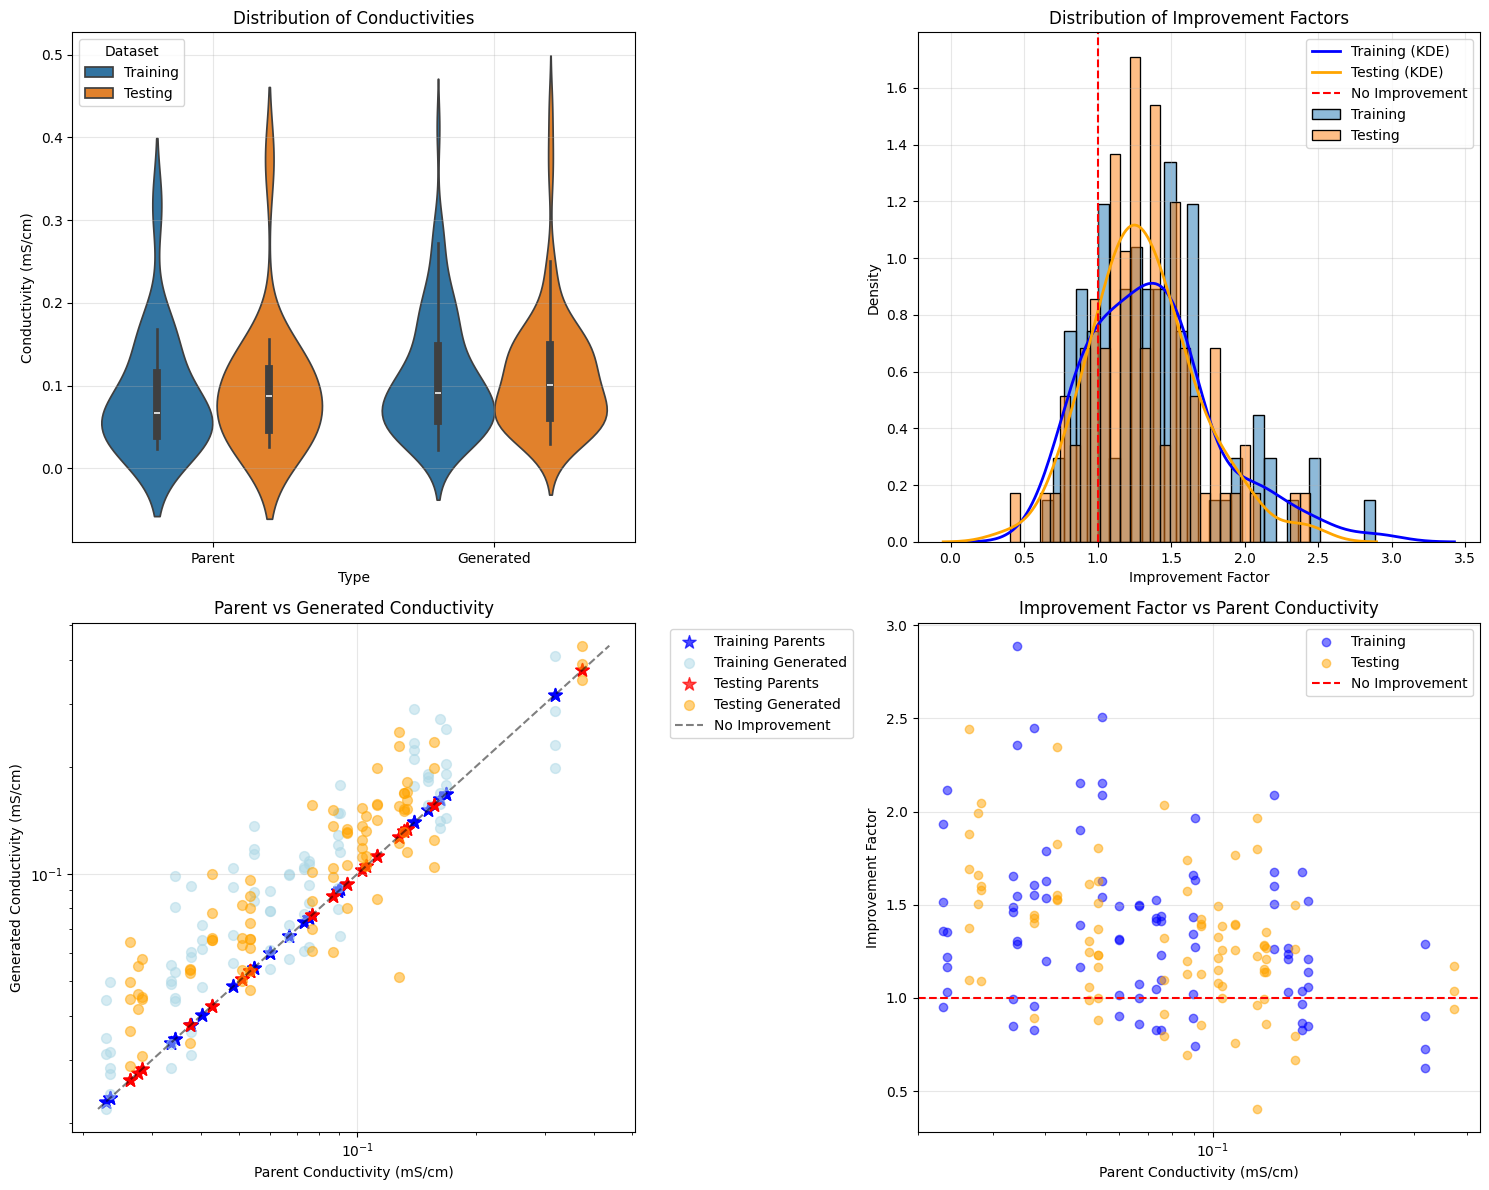


Comparative Statistics:
--------------------------------------------------
                        Metric  Training  Testing
0                Total Parents   19.0000  19.0000
1            Total Generations   89.0000  86.0000
2     Mean Parent Conductivity    0.0874   0.0921
3  Mean Generated Conductivity    0.1100   0.1132
4      Mean Improvement Factor    1.3743   1.3206
5       Max Improvement Factor    2.8902   2.4434
6             Success Rate (%)   78.6517  81.3953


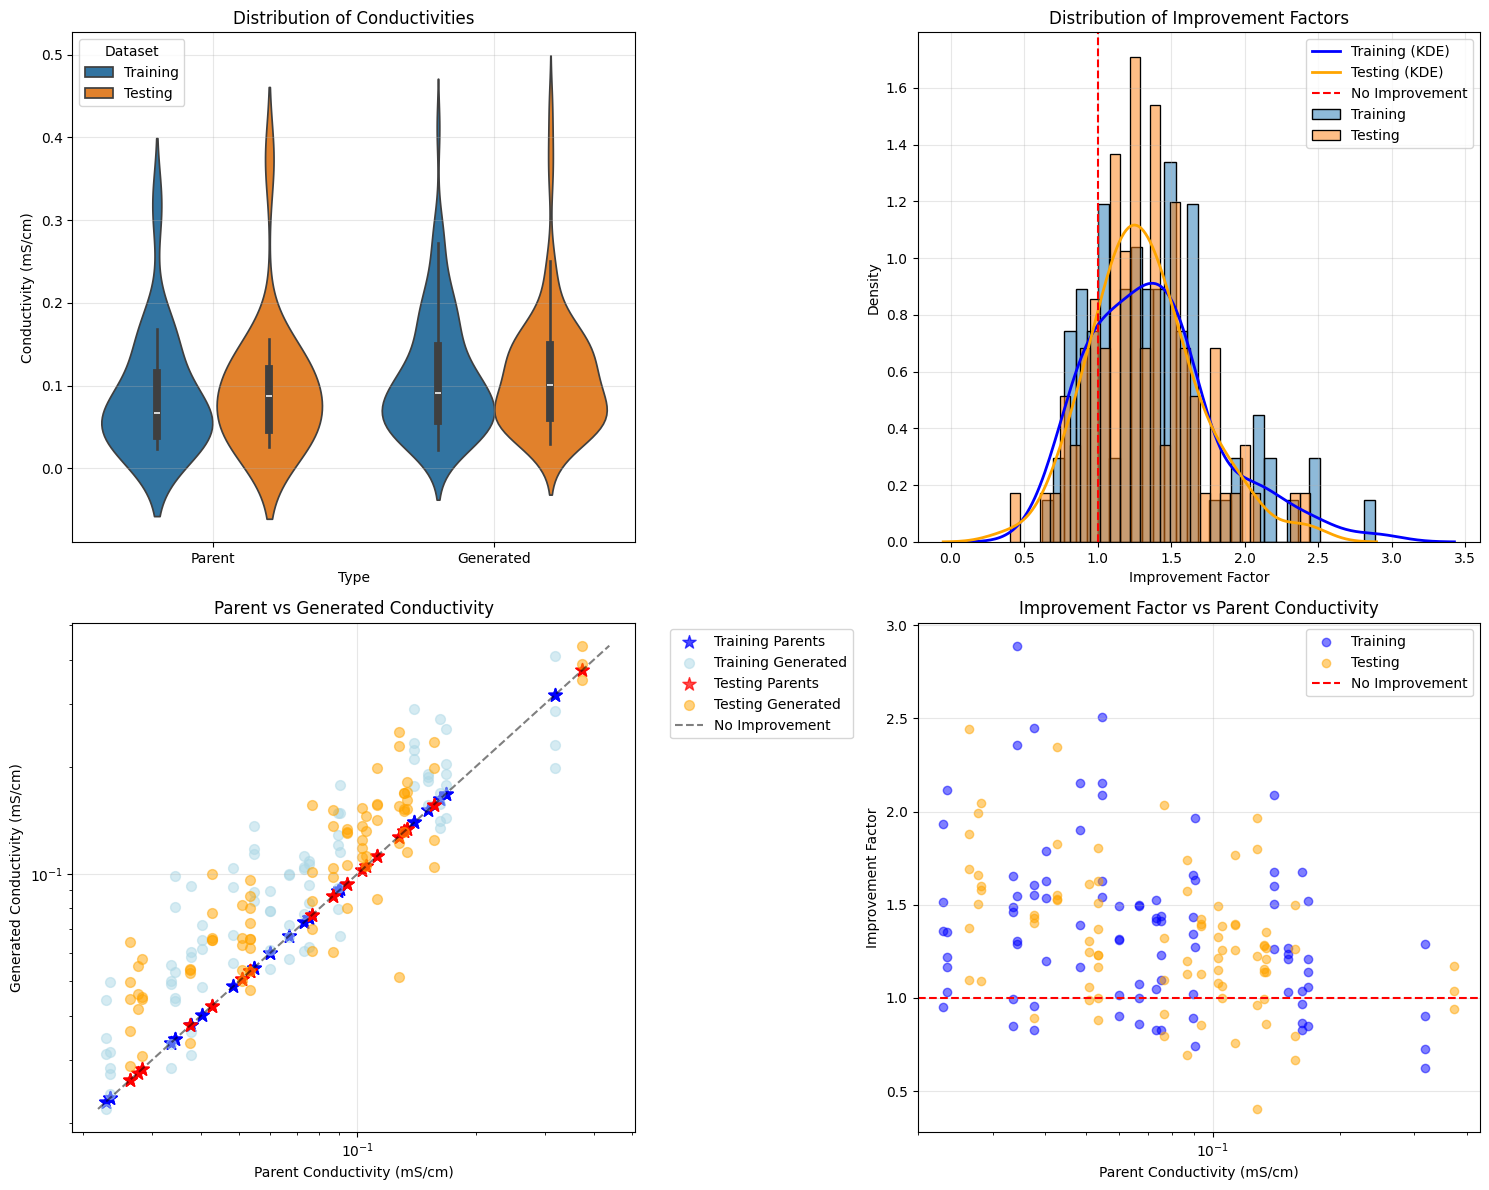


Comparative Statistics:
--------------------------------------------------
                        Metric  Training  Testing
0                Total Parents   19.0000  19.0000
1            Total Generations   89.0000  86.0000
2     Mean Parent Conductivity    0.0874   0.0921
3  Mean Generated Conductivity    0.1100   0.1132
4      Mean Improvement Factor    1.3743   1.3206
5       Max Improvement Factor    2.8902   2.4434
6             Success Rate (%)   78.6517  81.3953


In [40]:
# Just show plots
analyze_evaluation_comparison(train_evaluation, test_evaluation)

# Save plots
analyze_evaluation_comparison(
    train_evaluation, 
    test_evaluation,
    save_plots=True,
    save_dir='my_evaluation_plots'
)

## Run evaluation for train and test batch data, for zero-shot run or single epoch

# shortlist candidates that led to conductivity improvement

In [41]:
def analyze_improved_candidates(test_results, improvement_threshold=1.0, sort_by='improvement_factor'):
    """
    Analyze and extract improved candidates from test results
    
    Args:
        test_results: Test evaluation results
        improvement_threshold: Minimum improvement factor to consider (default: 1.0)
        sort_by: How to sort results ('improvement_factor' or 'conductivity')
    
    Returns:
        DataFrame with improved candidates sorted by specified criterion
    """
    # Extract results from the single epoch
    epoch_results = test_results['epoch_results'][0]['results']
    
    # Collect all generation results
    improved_candidates = []
    for parent_smiles, generations in epoch_results.items():
        for gen in generations:
            if gen['improvement_factor'] > improvement_threshold:
                improved_candidates.append({
                    'parent_smiles': parent_smiles,
                    'generated_smiles': gen['generated_smiles'],
                    'parent_conductivity': gen['parent_conductivity'],
                    'generated_conductivity': gen['actual_conductivity'],
                    'improvement_factor': gen['improvement_factor'],
                    'explanation': gen.get('explanation', 'No explanation provided')
                })
    
    # Convert to DataFrame
    df = pd.DataFrame(improved_candidates)
    
    # Sort based on specified criterion
    if sort_by == 'improvement_factor':
        df = df.sort_values('improvement_factor', ascending=False)
    elif sort_by == 'conductivity':
        df = df.sort_values('generated_conductivity', ascending=False)
    
    # Print summary
    print(f"\nImproved Candidates Analysis (threshold > {improvement_threshold}x):")
    print("-" * 80)
    print(f"Total improved candidates: {len(df)}")
    if len(df) > 0:
        print(f"Average improvement factor: {df['improvement_factor'].mean():.2f}x")
        print(f"Maximum improvement factor: {df['improvement_factor'].max():.2f}x")
        print(f"Average generated conductivity: {df['generated_conductivity'].mean():.4f} mS/cm")
        print(f"Maximum generated conductivity: {df['generated_conductivity'].max():.4f} mS/cm")
    
    return df


In [42]:

# Usage example:
improved_df = analyze_improved_candidates(test_evaluation)

# Print top 10 candidates
print("\nTop 10 Improved Candidates:")
print("-" * 80)
for i, row in improved_df.head(10).iterrows():
    print(f"\nCandidate {i+1}:")
    print(f"Parent SMILES: {row['parent_smiles']}")
    print(f"Generated SMILES: {row['generated_smiles']}")
    print(f"Improvement: {row['improvement_factor']:.2f}x")
    print(f"Conductivity: {row['generated_conductivity']:.4f} mS/cm")
    print(f"Parent Conductivity: {row['parent_conductivity']:.4f} mS/cm")
    print(f"Explanation: {row['explanation']}")

# Optionally save to CSV
#if save_results:
    #improved_df.to_csv('improved_candidates.csv', index=False)


Improved Candidates Analysis (threshold > 1.0x):
--------------------------------------------------------------------------------
Total improved candidates: 70
Average improvement factor: 1.43x
Maximum improvement factor: 2.44x
Average generated conductivity: 0.1164 mS/cm
Maximum generated conductivity: 0.4383 mS/cm

Top 10 Improved Candidates:
--------------------------------------------------------------------------------

Candidate 21:
Parent SMILES: CC#CC(=O)N(C)CC(C)(CO[Cu])COC(=O)[Au]
Generated SMILES: CC#CC(=O)N(C)CC(C)(CO[Cu])COCCOCOC(=O)[Au]
Improvement: 2.44x
Conductivity: 0.0644 mS/cm
Parent Conductivity: 0.0264 mS/cm
Explanation: Extended the ether chain to optimize conductivity

Candidate 42:
Parent SMILES: COC(=O)C(CO[Cu])OC(=O)[Au]
Generated SMILES: COC(=O)C(COCN(C)CCO[Cu])OC(=O)[Au]
Improvement: 2.35x
Conductivity: 0.1001 mS/cm
Parent Conductivity: 0.0426 mS/cm
Explanation: Added N-methylated amine to balance polarity and flexibility

Candidate 1:
Parent SMILES: C=CCN(

In [43]:
improved_df

,parent_smiles,generated_smiles,parent_conductivity,generated_conductivity,improvement_factor,explanation
20,CC#CC(=O)N(C)CC(C)(CO[Cu])COC(=O)[Au],CC#CC(=O)N(C)CC(C)(CO[Cu])COCCOCOC(=O)[Au],0.026359,0.064405,2.443356,Extended the ether chain to optimize conductivity
41,COC(=O)C(CO[Cu])OC(=O)[Au],COC(=O)C(COCN(C)CCO[Cu])OC(=O)[Au],0.042621,0.100069,2.347873,Added N-methylated amine to balance polarity a...
0,C=CCN(CC(CO[Cu])OC(=O)[Au])C(C)(C)C,C=CCN(CC(COCCO[Cu])OC(=O)[Au])C(C)(C)C,0.028213,0.057758,2.047219,Extended ether linkage near Cu to increase fle...
67,CC(CCO[Cu])OC(=O)[Au],CC(CCO[Cu])OCCOCC(=O)[Au],0.076606,0.155859,2.034552,Extended ether linkage for improved conductivity
33,CC(C)(C#CC=CC(C)(C)OC(=O)[Au])O[Cu],CC(C)(C#CC=CC(C)(C)OC(=O)[Au])OCCOCCO[Cu],0.027664,0.055138,1.993144,Added polyethylene glycol-like segment to enha...
...,...,...,...,...,...,...
46,N#CCCNCC(CO[Cu])OC(=O)[Au],N#CCCNCC(CO[Cu])OC(=O)CCCO[Au],0.102866,0.111361,1.082588,Inserted alkyl spacer between carbonyl and Au ...
35,CCOCC(CN(C)CCO[Cu])OC(=O)[Au],CCOCC(CN(C)CCCO[Cu])OC(=O)[Au],0.105122,0.112064,1.066031,Increased chain length near Cu center to optim...
64,CNCC(=O)NCC(C)(CO[Cu])COC(=O)[Au],CNCC(=O)NCC(C)(CO[Cu])C(O)COC(=O)[Au],0.050772,0.053727,1.058212,Added hydroxyl group near copper center
24,O=C([Au])OCCOCCOCCOCCO[Cu],CN(CCO[Cu])COCCOCCOCCOCCOCCOC(=O)[Au],0.373556,0.388261,1.039366,Incorporated N-methylation to modify polarity ...


#### find out novel candidates (not present in starting dataset)

In [46]:
def filter_novel_candidates(improved_df, polygen_dataset):
    """
    Filter improved candidates to keep only novel molecules not present in original dataset
    
    Args:
        improved_df: DataFrame with improved candidates
        polygen_dataset: Original dataset DataFrame
    
    Returns:
        DataFrame with only novel improved candidates
    """
    # Convert SMILES to sets for efficient comparison
    original_smiles = set(polygen_dataset['mol_smiles'])
    
    # Filter improved_df
    novel_mask = ~improved_df['generated_smiles'].isin(original_smiles)
    novel_df = improved_df[novel_mask].copy()
    
    # Print summary
    print("\nNovel Candidates Analysis:")
    print("-" * 80)
    print(f"Total improved candidates: {len(improved_df)}")
    print(f"Novel improved candidates: {len(novel_df)}")
    print(f"Filtered out candidates: {len(improved_df) - len(novel_df)}")
    print(f"Novelty rate: {len(novel_df)/len(improved_df)*100:.1f}%")
    
    if len(novel_df) > 0:
        print("\nPerformance of Novel Candidates:")
        print(f"Average improvement factor: {novel_df['improvement_factor'].mean():.2f}x")
        print(f"Maximum improvement factor: {novel_df['improvement_factor'].max():.2f}x")
        print(f"Average conductivity: {novel_df['generated_conductivity'].mean():.4f} mS/cm")
        print(f"Maximum conductivity: {novel_df['generated_conductivity'].max():.4f} mS/cm")
    
    return novel_df


In [47]:

# Usage:
novel_improved_df = filter_novel_candidates(improved_df, polygen_dataset)

# Print top 10 novel candidates
print("\nTop 10 Novel Improved Candidates:")
print("-" * 80)
for i, row in novel_improved_df.head(10).iterrows():
    print(f"\nCandidate {i+1}:")
    print(f"Parent SMILES: {row['parent_smiles']}")
    print(f"Generated SMILES: {row['generated_smiles']}")
    print(f"Improvement: {row['improvement_factor']:.2f}x")
    print(f"Conductivity: {row['generated_conductivity']:.4f} mS/cm")
    print(f"Parent Conductivity: {row['parent_conductivity']:.4f} mS/cm")
    print(f"Explanation: {row['explanation']}")

# Optionally save to CSV
# novel_improved_df.to_csv('novel_improved_candidates.csv', index=False)


Novel Candidates Analysis:
--------------------------------------------------------------------------------
Total improved candidates: 70
Novel improved candidates: 68
Filtered out candidates: 2
Novelty rate: 97.1%

Performance of Novel Candidates:
Average improvement factor: 1.44x
Maximum improvement factor: 2.44x
Average conductivity: 0.1163 mS/cm
Maximum conductivity: 0.4383 mS/cm

Top 10 Novel Improved Candidates:
--------------------------------------------------------------------------------

Candidate 21:
Parent SMILES: CC#CC(=O)N(C)CC(C)(CO[Cu])COC(=O)[Au]
Generated SMILES: CC#CC(=O)N(C)CC(C)(CO[Cu])COCCOCOC(=O)[Au]
Improvement: 2.44x
Conductivity: 0.0644 mS/cm
Parent Conductivity: 0.0264 mS/cm
Explanation: Extended the ether chain to optimize conductivity

Candidate 42:
Parent SMILES: COC(=O)C(CO[Cu])OC(=O)[Au]
Generated SMILES: COC(=O)C(COCN(C)CCO[Cu])OC(=O)[Au]
Improvement: 2.35x
Conductivity: 0.1001 mS/cm
Parent Conductivity: 0.0426 mS/cm
Explanation: Added N-methylated am

In [ ]:
#path_to_novel_candidates = os.path.join(data_home, 'htp_md/novel_candidates.csv')
#novel_improved_df.to_csv(path_to_novel_candidates, index=False)  

# draw the novel candidates


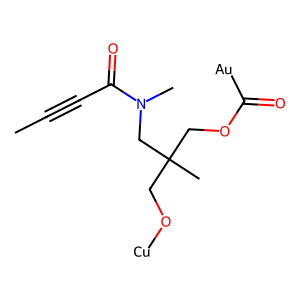
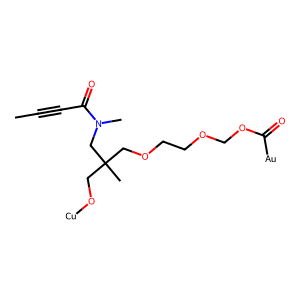
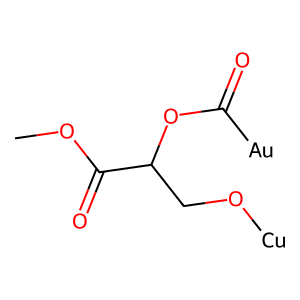
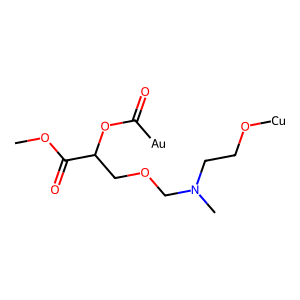
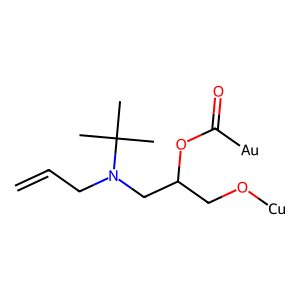
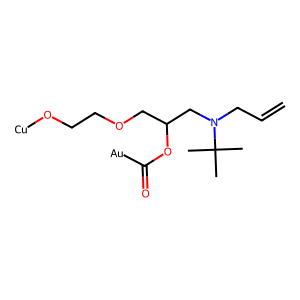
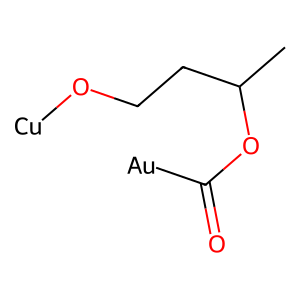
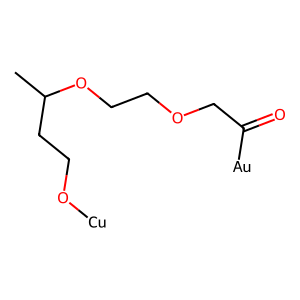
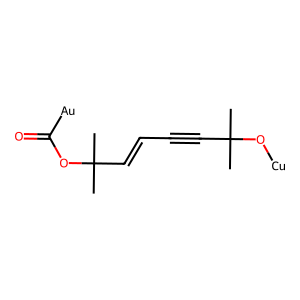
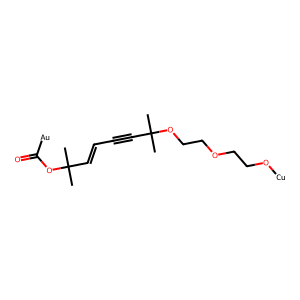
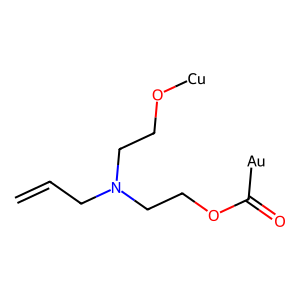
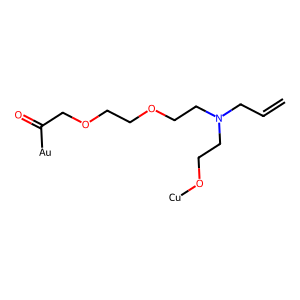
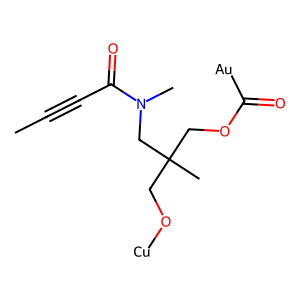
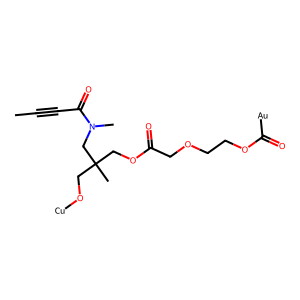
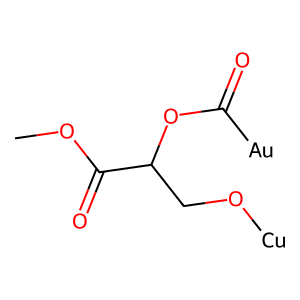
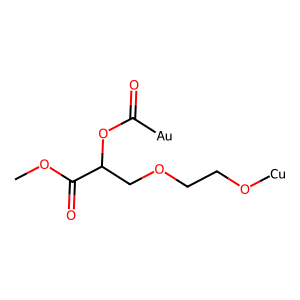
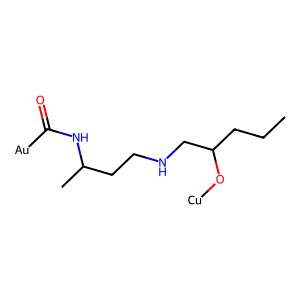
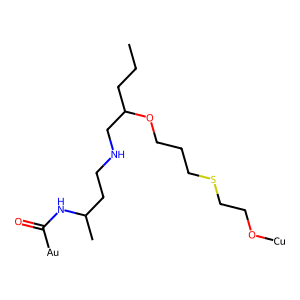
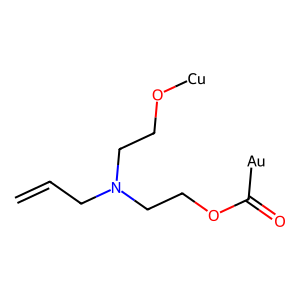
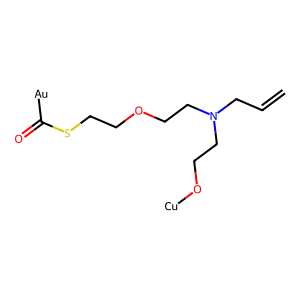
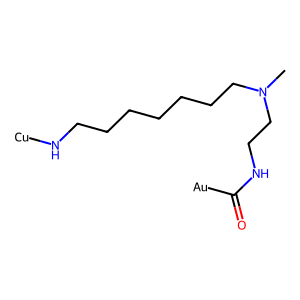
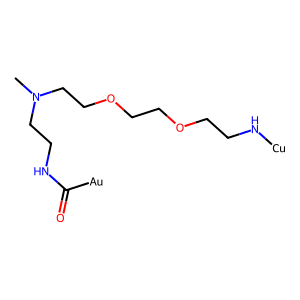
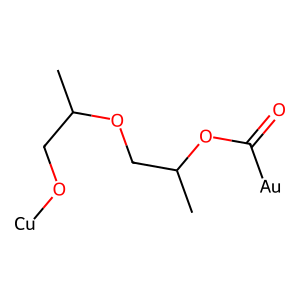
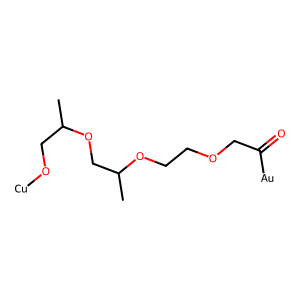
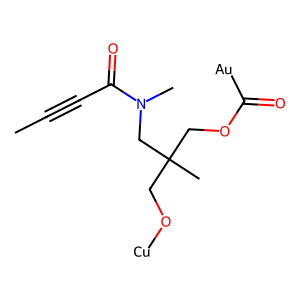
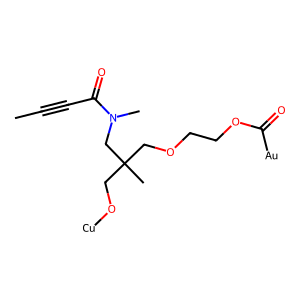
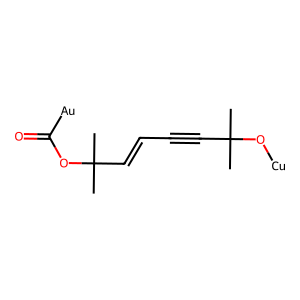
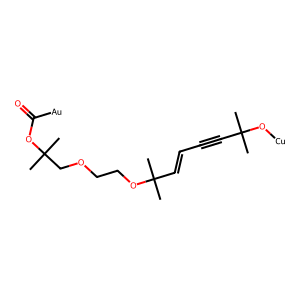
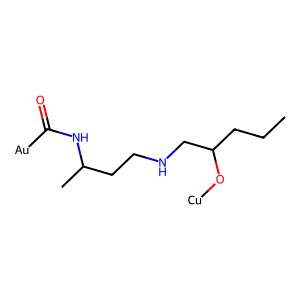
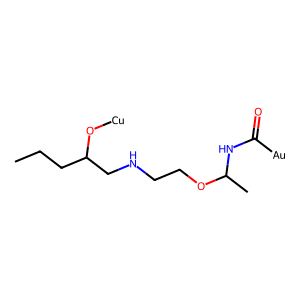
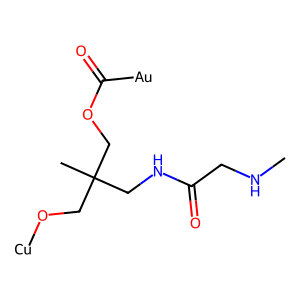
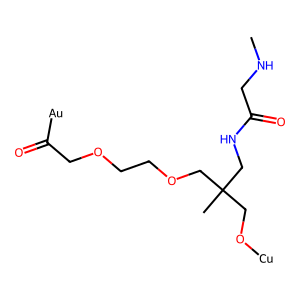
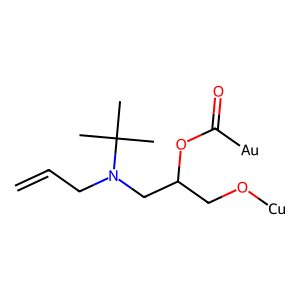
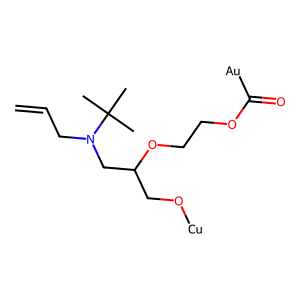
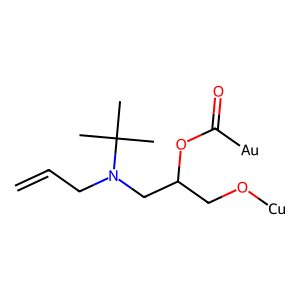
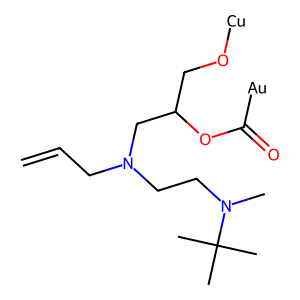
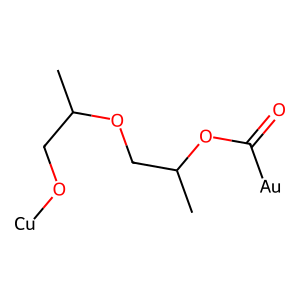
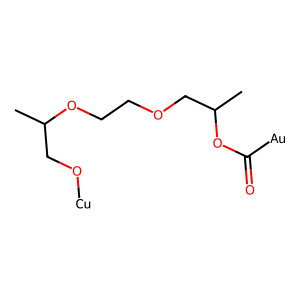
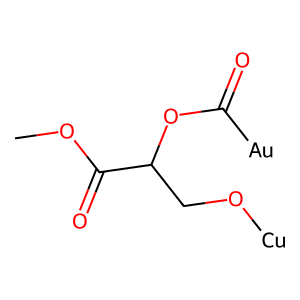
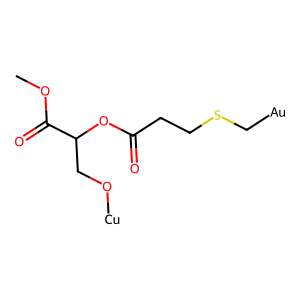

In [59]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
import pandas as pd
import numpy as np
from PIL import Image
from IPython.display import HTML, display
import io
import base64

def create_detailed_report(novel_df, n_pairs=20, save_html=False):
    """
    Create and display HTML report with molecule pairs and metrics
    
    Args:
        novel_df: DataFrame with novel improved candidates
        n_pairs: Number of top pairs to show
        save_html: Whether to also save the HTML file locally
    """
    # Sort by improvement factor and get top n pairs
    top_pairs = novel_df.sort_values('improvement_factor', ascending=False).head(n_pairs)
    
    html_content = """
    <html>
    <head>
        <style>
            .molecule-pair {
                margin: 20px;
                padding: 10px;
                border: 1px solid #ddd;
                border-radius: 5px;
                background-color: #f9f9f9;
            }
            .metrics {
                margin-left: 20px;
                font-family: monospace;
                background-color: white;
                padding: 10px;
                border-radius: 5px;
            }
            .improvement {
                color: green;
                font-weight: bold;
            }
            .molecule-container {
                display: flex;
                justify-content: space-around;
                margin: 20px 0;
            }
            .molecule {
                text-align: center;
                padding: 10px;
                background-color: white;
                border-radius: 5px;
            }
        </style>
    </head>
    <body>
    <h1 style="text-align: center; color: #2c3e50;">Top Improved Molecule Pairs</h1>
    """
    
    for i, row in top_pairs.iterrows():
        # Convert SMILES to molecules
        parent_mol = Chem.MolFromSmiles(row['parent_smiles'])
        generated_mol = Chem.MolFromSmiles(row['generated_smiles'])
        
        # Generate 2D coordinates
        AllChem.Compute2DCoords(parent_mol)
        AllChem.Compute2DCoords(generated_mol)
        
        # Create images and convert to base64
        parent_img = Draw.MolToImage(parent_mol, size=(300, 300))
        generated_img = Draw.MolToImage(generated_mol, size=(300, 300))
        
        # Convert images to base64
        buffered_parent = io.BytesIO()
        parent_img.save(buffered_parent, format="PNG")
        parent_img_str = base64.b64encode(buffered_parent.getvalue()).decode()
        
        buffered_generated = io.BytesIO()
        generated_img.save(buffered_generated, format="PNG")
        generated_img_str = base64.b64encode(buffered_generated.getvalue()).decode()
        
        html_content += f"""
        <div class="molecule-pair">
            <h2 style="color: #34495e;">Pair {i+1}</h2>
            <div class="molecule-container">
                <div class="molecule">
                    <h3 style="color: #2980b9;">Parent Molecule</h3>
                    <img src="data:image/png;base64,{parent_img_str}">
                    <p>SMILES: <span style="font-size: 0.8em;">{row['parent_smiles']}</span></p>
                </div>
                <div class="molecule">
                    <h3 style="color: #27ae60;">Generated Molecule</h3>
                    <img src="data:image/png;base64,{generated_img_str}">
                    <p>SMILES: <span style="font-size: 0.8em;">{row['generated_smiles']}</span></p>
                </div>
            </div>
            <div class="metrics">
                <p><b>Improvement Factor:</b> <span class="improvement">{row['improvement_factor']:.2f}x</span></p>
                <p><b>Parent Conductivity:</b> {row['parent_conductivity']:.4f} mS/cm</p>
                <p><b>Generated Conductivity:</b> {row['generated_conductivity']:.4f} mS/cm</p>
                <p><b>Explanation:</b> {row['explanation']}</p>
            </div>
        </div>
        """
    
    html_content += "</body></html>"
    
    # Save HTML file if requested
    if save_html:
        with open("molecule_pairs_report.html", "w") as f:
            f.write(html_content)
        print("HTML report saved as: molecule_pairs_report.html")
    
    # Display in notebook
    display(HTML(html_content))

# Usage:
# Just display in notebook
create_detailed_report(novel_improved_df, n_pairs=20)

# Or save and display
# create_detailed_report(novel_improved_df, n_pairs=20, save_html=True)